In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

import scipy.stats as stats
from IPython.display import display, Math, Latex, Markdown
from IPython.core.display import SVG

m_flat = 0.582 # kilograms
m_full = 0.583 # kilograms

def v_f(t, a, u=0): 
    return (u + a * t)

# Input Degrees
def a_component(a, theta):
    x = a * np.cos(np.deg2rad(theta))
    y = a * np.sin(np.deg2rad(theta))
    return (x, y)

def pandas_df_to_markdown_table(df):
    from IPython.display import Markdown, display
    fmt = ['--:' for i in range(len(df.columns))]
    df_fmt = pd.DataFrame([fmt], columns=df.columns)
    df_formatted = pd.concat([df_fmt, df])
    display(Markdown(df_formatted.to_csv(sep="|", index=False)))

data = pd.read_csv('P250B_Mar8_Under582_3_Firm583_18.txt', sep='\t')
flat_data = data.loc[:,("Time (s) Run #3",
                  "Position (m) Run #3",
                  "Velocity (m/s) Run #3",
                  "Acceleration (m/s²) Run #3")] 
flat_data.columns = ['time','pos','vel','acc']

flat_data = flat_data.loc[20:119]

full_data = data.loc[:,("Time (s) Run #18",
                  "Position (m) Run #18",
                  "Velocity (m/s) Run #18",
                  "Acceleration (m/s²) Run #18")]
full_data.columns = ['time','pos','vel','acc']
full_data = full_data.loc[20:119]

#Local maxima: https://eddwardo.github.io/posts/2019-06-05-finding-local-extreams-in-pandas-time-series/
ilocs_max = argrelextrema(flat_data.pos.values, np.greater_equal, order=5)[0]
# flat_data.pos.plot(figsize=(20,8), alpha=.3)

# mark flat bounces:
flat_bounces = ilocs_max[range(2,7)]
# flat_bounces = ilocs_max
flat_calibration = np.average([flat_data.pos.values[flat_bounces]])

# Process flat columns: 
flat_data['pos_cal'] = flat_calibration - flat_data['pos']  
flat_data['vel_cal'] = -1 * flat_data['vel']   
flat_data['acc_cal'] = -1 * flat_data['acc']   
flat_data['ke'] = (m_flat / 2) * flat_data['vel_cal'] * flat_data['vel_cal']  
flat_data['pe'] = m_flat * 9.8 * flat_data['pos_cal']
flat_data['me'] = flat_data['ke'] + flat_data['pe']

# Mark maximum and minimum V:
ilocs_v_max = argrelextrema(flat_data.vel_cal.values, np.greater_equal, order=3)[0]
ilocs_v_min = argrelextrema(flat_data.vel_cal.values, np.less_equal, order=3)[0]
flat_v_max = ilocs_v_max[range(2,7)]
flat_v_min = ilocs_v_min[range(1,6)]

# mark full bounces: 
ilocs_max = argrelextrema(full_data.pos.values, np.greater_equal, order=5)[0]
full_bounces = ilocs_max[range(21,26)]
# full_bounces = ilocs_max
full_calibration=np.average([full_data.pos.values[full_bounces]]) 

# Process full columns: 
full_data['pos_cal'] = full_calibration - full_data['pos'] 
full_data['vel_cal'] = -1 * full_data['vel']   
full_data['acc_cal'] = -1 * full_data['acc']   
full_data['ke'] = (m_full / 2) * full_data['vel_cal'] * full_data['vel_cal']  
full_data['pe'] = m_full * 9.8 * full_data['pos_cal']
full_data['me'] = full_data['ke'] + full_data['pe']

# Mark maximum and minimum V:
ilocs_v_max = argrelextrema(full_data.vel_cal.values, np.greater_equal, order=3)[0]
ilocs_v_min = argrelextrema(full_data.vel_cal.values, np.less_equal, order=3)[0]
full_v_max = ilocs_v_max[range(7,12)]
full_v_min = ilocs_v_min[range(7,12)]


$$\text{Mark Davis, Wendy D'Ilijent, Arnie McSleepsnaught}$$
$$\text{And Dr. Elteto}$$

## Data Tables
The data below represents a selection of the whole collected set that was deemed to be most pertinent to the experiment. This data has been calibrated using the local maxima for position at the points where the balls strike the ground. 

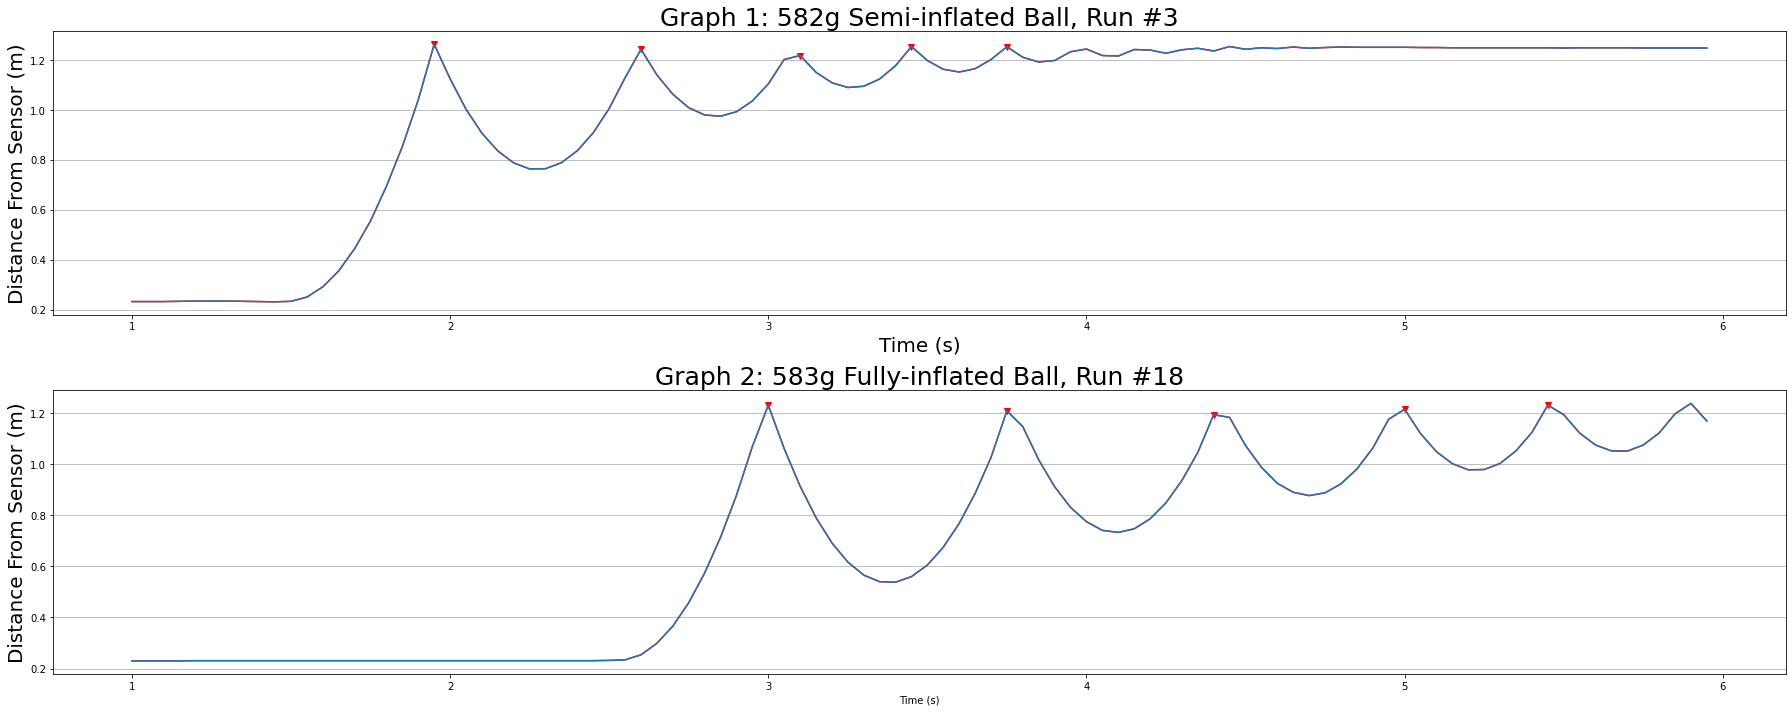

In [41]:
calibration, ((cax1,cax2)) = plt.subplots(2,1, sharex=False,figsize=(25,10))
cax1.plot(flat_data.time, flat_data.pos, marker="v", color='red', markevery=flat_bounces)
# cax1.plot(flat_data.time, flat_data.pos, marker="v", color='red', markevery=flat_pe_max)
cax1.plot(flat_data.time, flat_data.pos)
cax2.plot(full_data.time, full_data.pos, marker="v", color='red', markevery=full_bounces)
# cax2.plot(full_data.time, full_data.pos, marker="v", color='red', markevery=full_pe_max)
cax2.plot(full_data.time, full_data.pos)

cax1.set_xlabel('Time (s)', size=20) 
cax1.set_ylabel('Distance From Sensor (m)', size=20) 
cax1.set_title('Graph 1: 582g Semi-inflated Ball, Run #3', size=25)
cax1.grid(axis='y')

cax2.set_xlabel('Time (s)')
cax2.set_ylabel('Distance From Sensor (m)', size=20)
cax2.set_title('Graph 2: 583g Fully-inflated Ball, Run #18', size=25)
cax2.grid(axis='y')

calibration.tight_layout()

In [20]:
Markdown("""_Figure 1: Graphs showing the points used to calibrate height. 
Five points were selected (marked with a red "v" above) to be used in future 
calculations. The mean of these 5 points were applied to all instances where 
height was a factor._""")

_Figure 1: Graphs showing the points used to calibrate height. 
Five points were selected (marked with a red "v" above) to be used in future 
calculations. The mean of these 5 points were applied to all instances where 
height was a factor._

Kinetic energy is calculated using the following formula: 
$$\text{KE} = \left( \frac{1}{2} \right) \text{mV}^2$$

Potential energy (U$_g$) is calculated using:
$$\text{U}_g = \text{m} \cdot \text{g} \cdot \text{h}$$
Total mechanical energy (E) is calculated using: 
$$\text{E = KE + U}_g$$

In [13]:
flat_data.set_index("time")
flat_display=flat_data.loc[:,('time','pos_cal','vel_cal','acc_cal','ke','pe','me')]
# flat_display.fillna('',inplace=True)
flat_display['time'] = flat_display['time'].map('{:,.2f}'.format)
flat_display['pos_cal'] = flat_display['pos_cal'].map('{:,.3f}'.format)
flat_display['vel_cal'] = flat_display['vel_cal'].map('{:,.3f}'.format)
flat_display['acc_cal'] = flat_display['acc_cal'].map('{:,.3f}'.format)
flat_display['ke'] = flat_display['ke'].map('{:,.3f}'.format)
flat_display['pe'] = flat_display['pe'].map('{:,.3f}'.format)
flat_display['me'] = flat_display['me'].map('{:,.3f}'.format)
flat_display.fillna(' ',inplace=True)

flat_display.columns = [
    "$$ \\text{Time (s)}$$",
    "$$ \\text{Height (m)}$$",
    '$$ \\text{V } \\left(\\frac{m}{s} \\right)$$',
    "$$ \\text{a} \\left( \\frac{m}{s^2} \\right)$$",
    "$$ \\text{KE (J)}$$",
    "$$ \\text{U}_g\\text{ (J)}$$",
    "$$ \\text{E (J)}$$"
]
pandas_df_to_markdown_table(flat_display)

$$ \text{Time (s)}$$|$$ \text{Height (m)}$$|$$ \text{V } \left(\frac{m}{s} \right)$$|$$ \text{a} \left( \frac{m}{s^2} \right)$$|$$ \text{KE (J)}$$|$$ \text{U}_g\text{ (J)}$$|$$ \text{E (J)}$$
--:|--:|--:|--:|--:|--:|--:
1.00|1.013|-0.002|-0.086|0.000|5.779|5.779
1.05|1.013|-0.006|-0.079|0.000|5.779|5.779
1.10|1.013|-0.010|-0.047|0.000|5.779|5.779
1.15|1.012|-0.012|0.012|0.000|5.773|5.773
1.20|1.011|-0.010|0.087|0.000|5.767|5.768
1.25|1.011|-0.003|0.146|0.000|5.767|5.767
1.30|1.011|0.007|0.130|0.000|5.767|5.767
1.35|1.012|0.015|-0.162|0.000|5.773|5.773
1.40|1.013|0.011|-1.114|0.000|5.779|5.779
1.45|1.014|-0.056|-2.959|0.001|5.785|5.786
1.50|1.012|-0.256|-5.378|0.019|5.773|5.792
1.55|0.995|-0.605|-7.567|0.107|5.676|5.783
1.60|0.954|-1.053|-8.938|0.323|5.442|5.765
1.65|0.890|-1.529|-9.503|0.680|5.077|5.758
1.70|0.801|-2.013|-9.644|1.179|4.570|5.749
1.75|0.690|-2.496|-9.818|1.813|3.937|5.750
1.80|0.551|-2.980|-5.982|2.584|3.144|5.728
1.85|0.392|-3.508|6.344|3.581|2.237|5.818
1.90|0.205|-2.796|23.405|2.275|1.170|3.445
1.95|-0.017|-0.777|32.544|0.176|-0.096|0.080
2.00|0.121|1.310|24.678|0.499|0.691|1.191
2.05|0.243|2.149|7.810|1.344|1.387|2.731
2.10|0.339|1.682|-5.172|0.823|1.935|2.758
2.15|0.410|1.195|-9.621|0.416|2.340|2.755
2.20|0.458|0.713|-9.641|0.148|2.613|2.761
2.25|0.482|0.232|-9.601|0.016|2.750|2.766
2.30|0.481|-0.247|-9.575|0.018|2.745|2.762
2.35|0.457|-0.725|-9.602|0.153|2.608|2.761
2.40|0.409|-1.203|-9.352|0.421|2.334|2.755
2.45|0.337|-1.694|-5.724|0.835|1.923|2.758
2.50|0.240|-2.085|3.693|1.265|1.370|2.635
2.55|0.117|-1.561|15.167|0.709|0.668|1.378
2.60|0.003|-0.228|19.861|0.015|0.018|0.033
2.65|0.106|1.000|13.098|0.291|0.606|0.897
2.70|0.183|1.313|1.337|0.502|1.045|1.547
2.75|0.237|0.827|-7.002|0.199|1.353|1.552
2.80|0.266|0.345|-9.632|0.035|1.518|1.553
2.85|0.271|-0.133|-9.714|0.005|1.547|1.552
2.90|0.253|-0.616|-8.805|0.110|1.444|1.555
2.95|0.210|-1.126|-4.400|0.369|1.199|1.568
3.00|0.142|-1.304|3.768|0.495|0.811|1.306
3.05|0.044|-0.765|11.073|0.170|0.252|0.422
3.10|0.028|0.154|11.406|0.007|0.161|0.168
3.15|0.095|0.739|4.538|0.159|0.543|0.702
3.20|0.137|0.614|-3.662|0.110|0.783|0.892
3.25|0.156|0.136|-8.389|0.005|0.891|0.896
3.30|0.151|-0.342|-7.830|0.034|0.862|0.896
3.35|0.122|-0.822|-2.564|0.197|0.697|0.894
3.40|0.069|-0.777|4.512|0.176|0.395|0.570
3.45|-0.008|-0.198|8.127|0.011|-0.044|-0.033
3.50|0.048|0.388|4.684|0.044|0.275|0.319
3.55|0.083|0.451|-2.261|0.059|0.475|0.534
3.60|0.094|-0.021|-5.987|0.000|0.537|0.537
3.65|0.081|-0.467|-3.463|0.063|0.463|0.527
3.70|0.044|-0.489|1.954|0.070|0.252|0.322
3.75|-0.007|-0.119|4.275|0.004|-0.039|-0.035
3.80|0.035|0.217|1.568|0.014|0.201|0.214
3.85|0.054|0.109|-1.946|0.003|0.309|0.313
3.90|0.048|-0.247|-1.916|0.018|0.275|0.293
3.95|0.013|-0.239|0.637|0.017|0.075|0.092
4.00|0.002|-0.010|1.601|0.000|0.013|0.013
4.05|0.028|0.063|0.222|0.001|0.161|0.162
4.10|0.030|-0.068|-0.667|0.001|0.172|0.174
4.15|0.004|-0.114|-0.152|0.004|0.024|0.028
4.20|0.006|-0.034|0.375|0.000|0.035|0.036
4.25|0.019|-0.018|0.072|0.000|0.110|0.110
4.30|0.005|-0.052|-0.172|0.001|0.030|0.030
4.35|-0.001|-0.074|0.042|0.002|-0.005|-0.003
4.40|0.010|-0.029|0.273|0.000|0.058|0.058
4.45|-0.008|-0.028|0.269|0.000|-0.044|-0.044
4.50|0.003|-0.016|0.082|0.000|0.018|0.018
4.55|-0.003|-0.006|0.032|0.000|-0.016|-0.016
4.60|0.000|-0.026|0.008|0.000|0.001|0.001
4.65|-0.006|-0.008|0.029|0.000|-0.033|-0.033
4.70|-0.001|-0.012|0.020|0.000|-0.005|-0.005
4.75|-0.004|-0.012|0.008|0.000|-0.022|-0.022
4.80|-0.006|-0.017|0.086|0.000|-0.033|-0.033
4.85|-0.005|-0.001|0.114|0.000|-0.027|-0.027
4.90|-0.005|0.003|0.096|0.000|-0.027|-0.027
4.95|-0.005|0.003|0.060|0.000|-0.027|-0.027
5.00|-0.005|0.008|0.047|0.000|-0.027|-0.027
5.05|-0.004|0.012|-0.000|0.000|-0.022|-0.022
5.10|-0.004|0.008|-0.054|0.000|-0.022|-0.022
5.15|-0.003|0.003|-0.056|0.000|-0.016|-0.016
5.20|-0.003|0.001|-0.016|0.000|-0.016|-0.016
5.25|-0.003|0.002|0.019|0.000|-0.016|-0.016
5.30|-0.003|0.005|0.021|0.000|-0.016|-0.016
5.35|-0.003|0.005|-0.002|0.000|-0.016|-0.016
5.40|-0.003|0.004|-0.026|0.000|-0.016|-0.016
5.45|-0.003|0.002|-0.035|0.000|-0.016|-0.016
5.50|-0.002|0.000|-0.028|0.000|-0.010|-0.010
5.55|-0.003|-0.001|-0.008|0.000|-0.016|-0.016
5.60|-0.003|-0.001|0.018|0.000|-0.016|-0.016
5.65|-0.003|0.001|0.037|0.000|-0.016|-0.016
5.70|-0.003|0.003|0.031|0.000|-0.016|-0.016
5.75|-0.002|0.005|0.004|0.000|-0.010|-0.010
5.80|-0.002|0.004|-0.020|0.000|-0.010|-0.010
5.85|-0.002|0.002|-0.029|0.000|-0.010|-0.010
5.90|-0.002|0.001|-0.026|0.000|-0.010|-0.010
5.95|-0.002|-0.000|-0.032|0.000|-0.010|-0.010


_Table 1: Calibrated Time, Height, Velocity (V) and Acceleration (a) data with calculated values for 
Kinetec Energy (KE), Potential Energy (U$_g$), and Total energy (E). Rows encompass five seconds of data using the 582g semi-inflated ball._  

In [4]:
full_data.set_index("time")
full_display=full_data.loc[:,('time','pos_cal','vel_cal','acc_cal','ke','pe','me')]
full_display['time'] = full_display['time'].map('{:,.2f}'.format)
full_display['pos_cal'] = full_display['pos_cal'].map('{:,.3f}'.format)
full_display['vel_cal'] = full_display['vel_cal'].map('{:,.3f}'.format)
full_display['acc_cal'] = full_display['acc_cal'].map('{:,.3f}'.format)
full_display['ke'] = full_display['ke'].map('{:,.3f}'.format)
full_display['pe'] = full_display['pe'].map('{:,.3f}'.format)
full_display['me'] = full_display['me'].map('{:,.3f}'.format)
full_display.fillna(' ',inplace=True)

full_display.columns = [
    "$$ \\text{Time (s)}$$",
    "$$ \\text{Height (m)}$$",
    '$$ \\text{V } \\left(\\frac{m}{s} \\right)$$',
    "$$ \\text{a} \\left( \\frac{m}{s^2} \\right)$$",
    "$$ \\text{KE (J)}$$",
    "$$ \\text{U}_g\\text{ (J)}$$",
    "$$ \\text{E (J)}$$"
]
pandas_df_to_markdown_table(full_display)

$$ \text{Time (s)}$$|$$ \text{Height (m)}$$|$$ \text{V } \left(\frac{m}{s} \right)$$|$$ \text{a} \left( \frac{m}{s^2} \right)$$|$$ \text{KE (J)}$$|$$ \text{U}_g\text{ (J)}$$|$$ \text{E (J)}$$
--:|--:|--:|--:|--:|--:|--:
1.00|0.986|-0.002|0.029|0.000|5.633|5.633
1.05|0.986|-0.002|-0.002|0.000|5.633|5.633
1.10|0.986|-0.003|-0.019|0.000|5.633|5.633
1.15|0.986|-0.005|-0.017|0.000|5.633|5.633
1.20|0.985|-0.006|0.002|0.000|5.628|5.628
1.25|0.985|-0.005|0.032|0.000|5.628|5.628
1.30|0.985|-0.002|0.055|0.000|5.628|5.628
1.35|0.985|0.002|0.050|0.000|5.628|5.628
1.40|0.985|0.004|0.016|0.000|5.628|5.628
1.45|0.985|0.003|-0.023|0.000|5.628|5.628
1.50|0.985|0.001|-0.038|0.000|5.628|5.628
1.55|0.985|-0.002|-0.029|0.000|5.628|5.628
1.60|0.985|-0.002|-0.010|0.000|5.628|5.628
1.65|0.985|-0.002|0.006|0.000|5.628|5.628
1.70|0.985|-0.002|0.015|0.000|5.628|5.628
1.75|0.985|-0.001|0.017|0.000|5.628|5.628
1.80|0.985|0.001|0.010|0.000|5.628|5.628
1.85|0.985|0.001|-0.002|0.000|5.628|5.628
1.90|0.985|0.000|-0.008|0.000|5.628|5.628
1.95|0.985|-0.001|-0.004|0.000|5.628|5.628
2.00|0.985|-0.001|0.004|0.000|5.628|5.628
2.05|0.985|-0.000|0.006|0.000|5.628|5.628
2.10|0.985|0.001|-0.002|0.000|5.628|5.628
2.15|0.985|0.000|-0.008|0.000|5.628|5.628
2.20|0.985|-0.001|-0.000|0.000|5.628|5.628
2.25|0.985|-0.001|0.012|0.000|5.628|5.628
2.30|0.985|0.001|0.005|0.000|5.628|5.628
2.35|0.985|0.001|-0.049|0.000|5.628|5.628
2.40|0.985|-0.002|-0.342|0.000|5.628|5.628
2.45|0.985|-0.013|-1.291|0.000|5.628|5.628
2.50|0.984|-0.087|-3.167|0.002|5.622|5.624
2.55|0.982|-0.300|-5.612|0.026|5.611|5.637
2.60|0.962|-0.664|-7.766|0.129|5.496|5.625
2.65|0.917|-1.120|-9.039|0.366|5.239|5.605
2.70|0.850|-1.598|-9.511|0.744|4.856|5.601
2.75|0.758|-2.078|-9.635|1.259|4.331|5.589
2.80|0.642|-2.559|-9.154|1.909|3.668|5.577
2.85|0.502|-3.049|-3.566|2.710|2.868|5.578
2.90|0.338|-3.373|10.609|3.316|1.931|5.248
2.95|0.147|-2.334|27.725|1.588|0.840|2.428
3.00|-0.015|-0.092|34.637|0.002|-0.086|-0.083
3.05|0.155|1.987|24.473|1.151|0.886|2.036
3.10|0.302|2.698|6.873|2.122|1.725|3.847
3.15|0.425|2.219|-5.642|1.435|2.428|3.864
3.20|0.524|1.738|-9.646|0.881|2.994|3.874
3.25|0.599|1.254|-9.675|0.458|3.422|3.881
3.30|0.650|0.769|-9.666|0.172|3.714|3.886
3.35|0.676|0.286|-9.628|0.024|3.862|3.886
3.40|0.678|-0.194|-9.589|0.011|3.874|3.885
3.45|0.656|-0.672|-9.567|0.132|3.748|3.880
3.50|0.611|-1.150|-9.561|0.386|3.491|3.876
3.55|0.541|-1.628|-9.756|0.773|3.091|3.864
3.60|0.448|-2.106|-7.362|1.293|2.560|3.852
3.65|0.331|-2.643|1.824|2.036|1.891|3.927
3.70|0.190|-2.343|16.419|1.600|1.086|2.686
3.75|0.007|-0.843|26.829|0.207|0.040|0.247
3.80|0.069|1.020|23.632|0.303|0.394|0.698
3.85|0.199|2.042|10.207|1.215|1.137|2.352
3.90|0.304|1.861|-2.621|1.010|1.737|2.746
3.95|0.385|1.378|-8.619|0.554|2.200|2.753
4.00|0.441|0.898|-9.592|0.235|2.520|2.755
4.05|0.475|0.420|-9.566|0.051|2.714|2.765
4.10|0.483|-0.058|-9.559|0.001|2.760|2.761
4.15|0.469|-0.536|-9.559|0.084|2.680|2.763
4.20|0.430|-1.014|-9.718|0.300|2.457|2.756
4.25|0.367|-1.492|-8.143|0.649|2.097|2.746
4.30|0.280|-2.017|-1.280|1.186|1.600|2.786
4.35|0.170|-1.976|10.641|1.138|0.971|2.109
4.40|0.022|-0.914|20.467|0.244|0.126|0.369
4.45|0.033|0.598|19.698|0.104|0.189|0.293
4.50|0.143|1.549|9.212|0.699|0.817|1.516
4.55|0.228|1.470|-2.271|0.630|1.303|1.933
4.60|0.291|0.977|-8.394|0.278|1.663|1.941
4.65|0.326|0.489|-9.628|0.070|1.863|1.932
4.70|0.339|0.012|-9.493|0.000|1.937|1.937
4.75|0.328|-0.454|-9.524|0.060|1.874|1.934
4.80|0.293|-0.929|-8.707|0.252|1.674|1.926
4.85|0.235|-1.428|-4.048|0.594|1.343|1.937
4.90|0.153|-1.626|5.399|0.771|0.874|1.645
4.95|0.040|-0.971|14.746|0.275|0.229|0.503
5.00|0.001|0.234|16.396|0.016|0.006|0.022
5.05|0.096|1.136|8.771|0.376|0.548|0.925
5.10|0.167|1.186|-1.440|0.410|0.954|1.364
5.15|0.214|0.709|-7.817|0.147|1.223|1.369
5.20|0.238|0.230|-9.596|0.015|1.360|1.375
5.25|0.237|-0.253|-9.707|0.019|1.354|1.373
5.30|0.213|-0.732|-8.163|0.156|1.217|1.373
5.35|0.164|-1.242|-2.367|0.450|0.937|1.387
5.40|0.092|-1.230|6.781|0.441|0.526|0.967
5.45|-0.015|-0.465|13.297|0.063|-0.086|-0.023
5.50|0.022|0.525|11.314|0.080|0.126|0.206
5.55|0.094|0.992|2.939|0.287|0.537|0.824
5.60|0.141|0.708|-5.058|0.146|0.806|0.952
5.65|0.164|0.234|-8.849|0.016|0.937|0.953
5.70|0.165|-0.235|-8.967|0.016|0.943|0.959
5.75|0.141|-0.720|-5.751|0.151|0.806|0.957
5.80|0.094|-1.027|1.161|0.307|0.537|0.845
5.85|0.019|-0.698|8.446|0.142|0.109|0.251
5.90|-0.022|0.092|10.224|0.002|-0.126|-0.123
5.95|0.047|0.694|4.695|0.140|0.269|0.409


_Table 2: Calibrated Time, Height, Velocity (V) and Acceleration (a) data with calculated values for 
Kinetec Energy (KE), Potential Energy (U$_g$), and Total energy (E). Rows encompass five seconds of data using the 583g fully-inflated ball._

## Graphs 
The graphs below plot the height, velocity, acceleration, kintetic energy, potential energy, and total mechanical energy as captured and calculated from runs #3 and #18 respectively. The graphs are collected into one figure per run and aligned by the time axis in order to readily observe the correlation between bounces and "air time". 

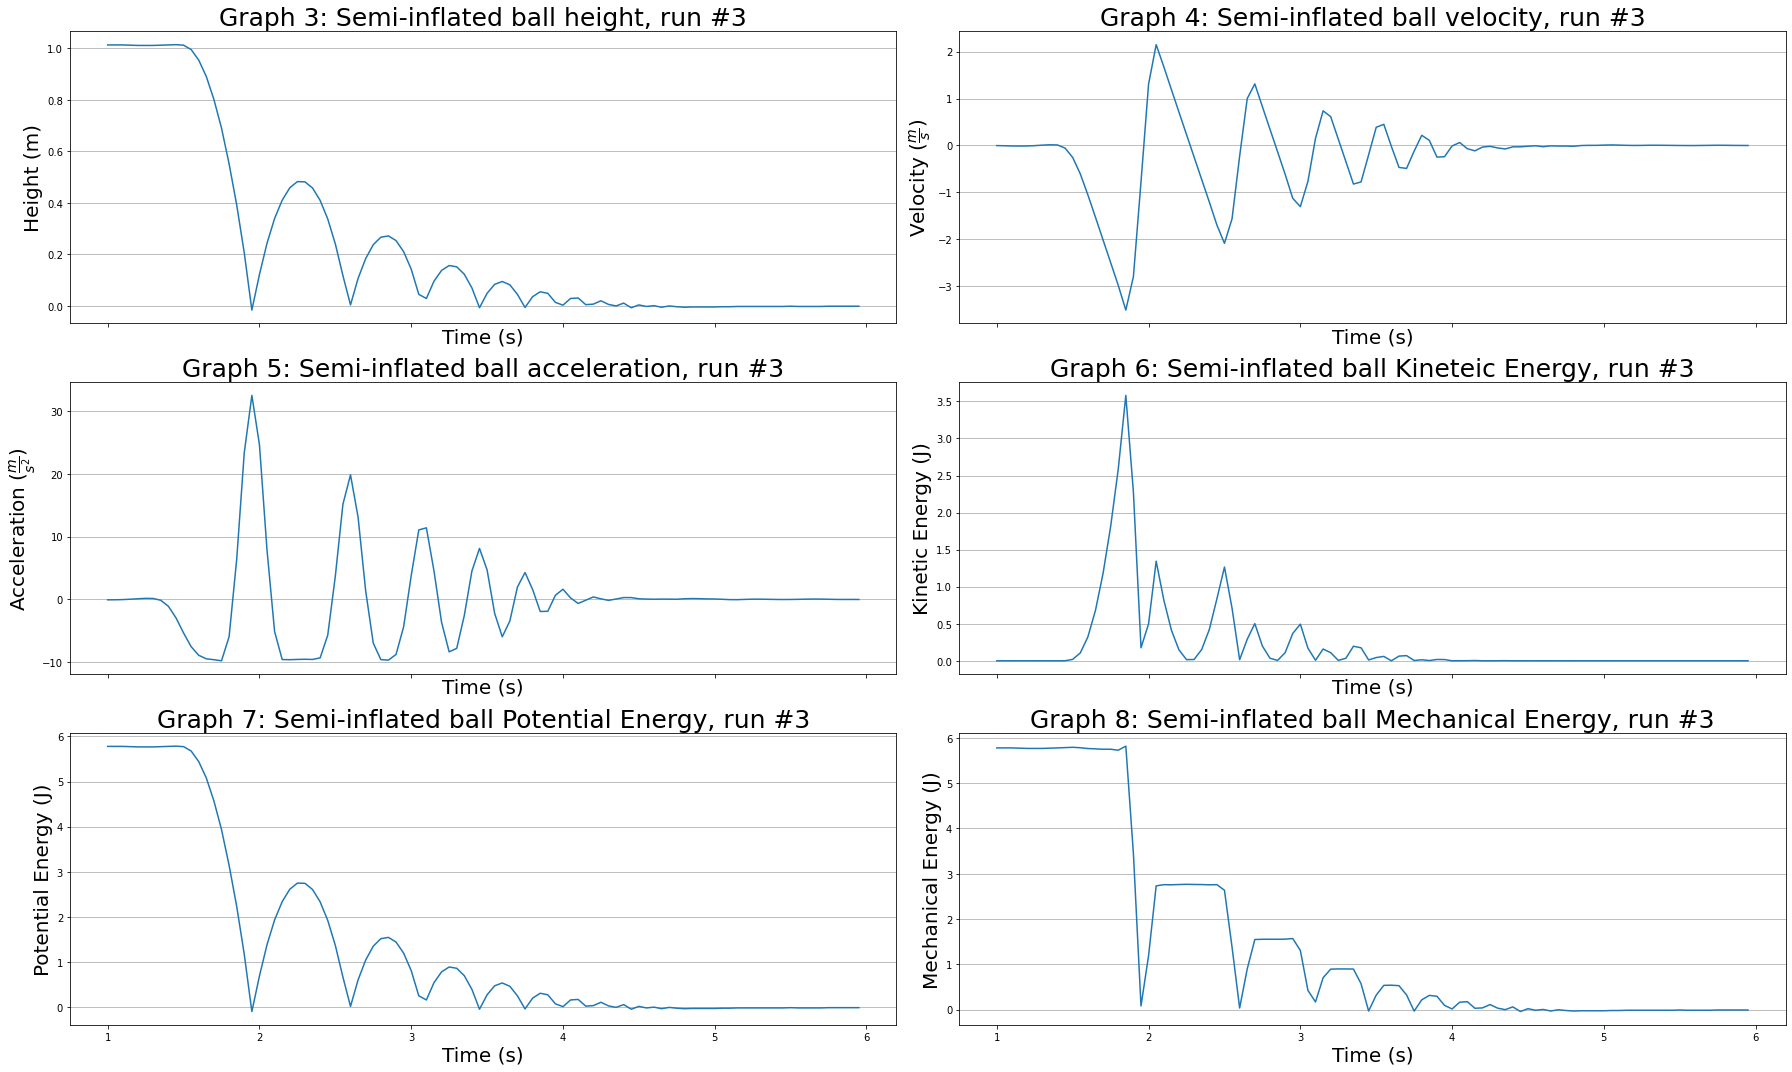

In [14]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, sharex=True,figsize=(25,15))
ax1.plot(flat_data.time, flat_data.pos_cal)
ax2.plot(flat_data.time, flat_data.vel_cal)
ax3.plot(flat_data.time, flat_data.acc_cal)
ax4.plot(flat_data.time, flat_data.ke)
ax5.plot(flat_data.time, flat_data.pe)
# ax6.plot(flat_data.time, flat_data.me, marker="v", color='green', markevery=flat_v_min)
# ax6.plot(flat_data.time, flat_data.me, marker="v", color='red', markevery=flat_v_max)

ax6.plot(flat_data.time, flat_data.me)

ax1.set_ylabel('Height (m)',size=20)
ax1.set_xlabel('Time (s)',size=20)
ax1.set_title('Graph 3: Semi-inflated ball height, run #3',size=25)
ax1.grid(axis='y')

# ax2.plot(flat_data.time, flat_data.vel_cal, marker="v", color='green', markevery=flat_v_min)
# ax2.plot(flat_data.time, flat_data.vel_cal, marker="v", color='red', markevery=flat_v_max)

ax2.set_ylabel('Velocity ($\\frac{m}{s}$)',size=20)
ax2.set_xlabel('Time (s)',size=20)
ax2.set_title('Graph 4: Semi-inflated ball velocity, run #3',size=25)
ax2.grid(axis='y')

ax3.set_ylabel('Acceleration ($\\frac{m}{s^2}$)',size=20)
ax3.set_xlabel('Time (s)',size=20)
ax3.set_title('Graph 5: Semi-inflated ball acceleration, run #3',size=25)
ax3.grid(axis='y')

ax4.set_ylabel('Kinetic Energy (J)',size=20)
ax4.set_xlabel('Time (s)',size=20)
ax4.set_title('Graph 6: Semi-inflated ball Kineteic Energy, run #3',size=25)

ax4.grid(axis='y')

ax5.set_ylabel('Potential Energy (J)',size=20)
ax5.set_xlabel('Time (s)',size=20)
ax5.set_title('Graph 7: Semi-inflated ball Potential Energy, run #3',size=25)
ax5.grid(axis='y')

ax6.set_ylabel('Mechanical Energy (J)',size=20)
ax6.set_xlabel('Time (s)',size=20)
ax6.set_title('Graph 8: Semi-inflated ball Mechanical Energy, run #3',size=25)
ax6.grid(axis='y')

# ax1.sharey(ax2)
# fig.set_label('Foo')
fig.tight_layout()

_Figure 2: Graphs plotting the height, velocity, acceleration, kinetic energy, potential energy, and total mechanical energy of run #3._

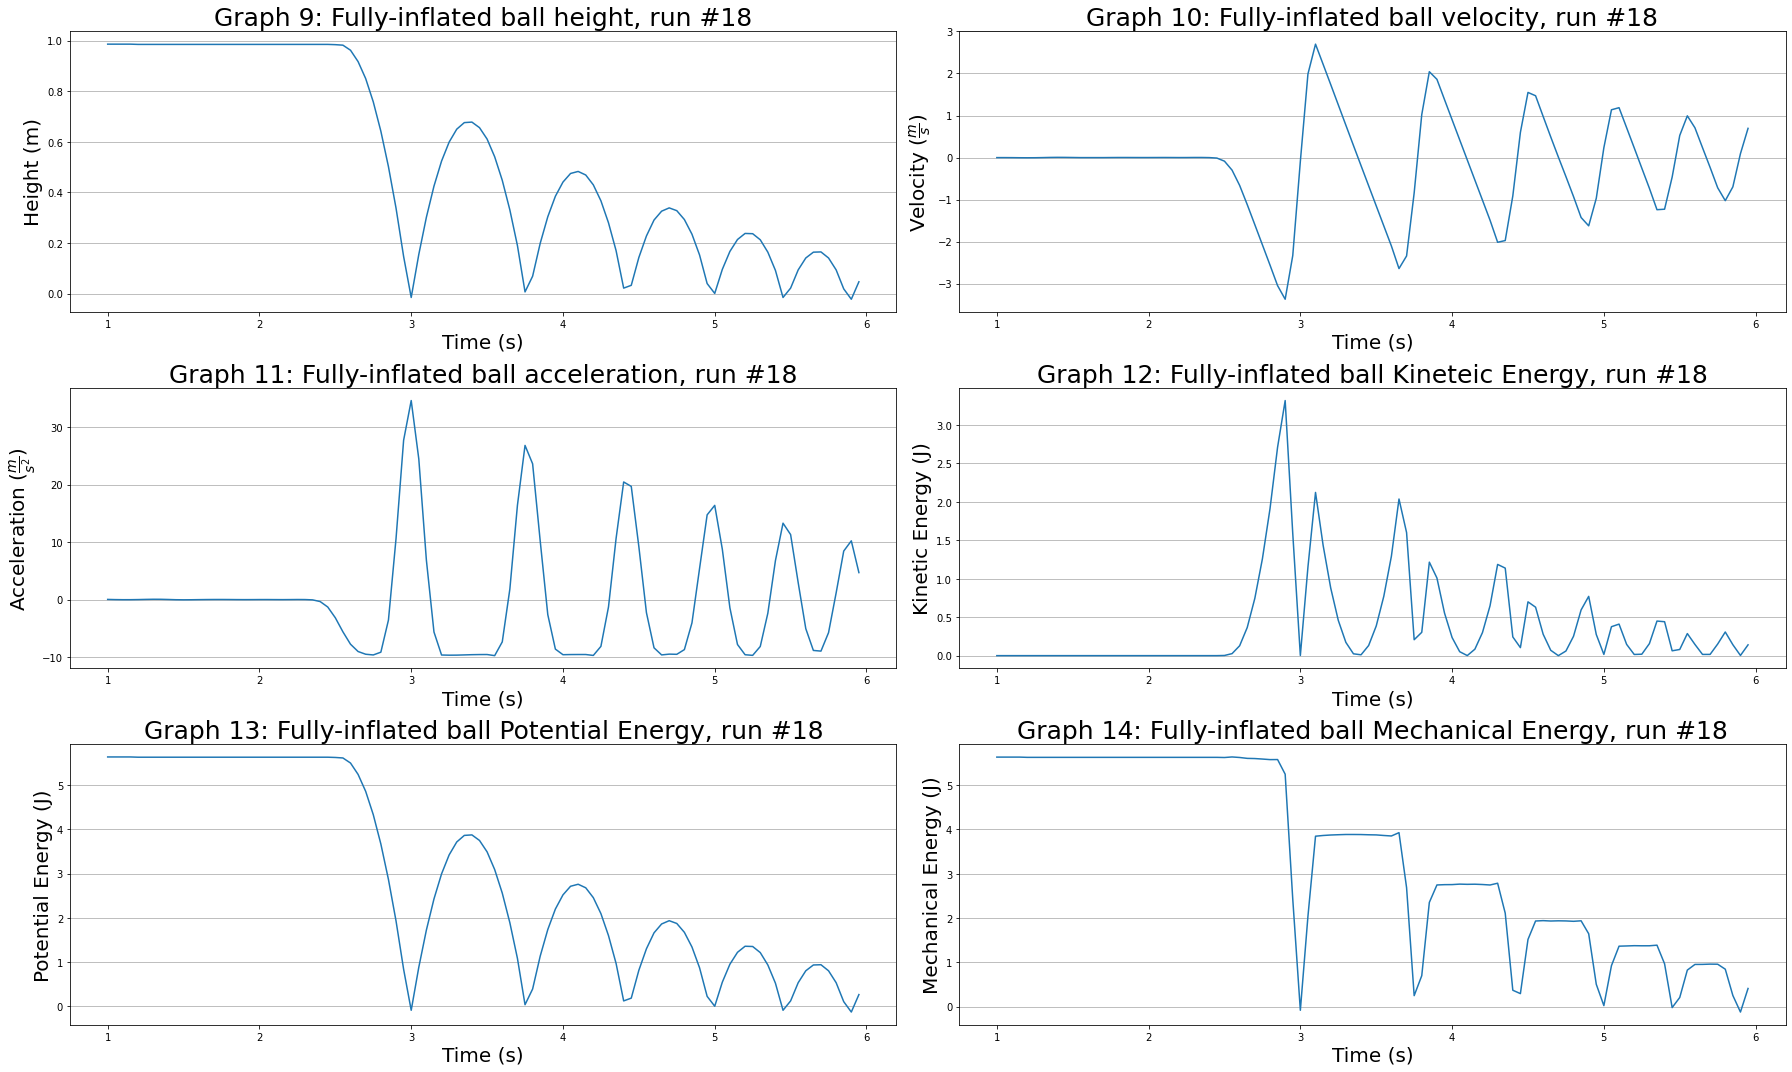

In [106]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(25,15))

ax1.plot(full_data.time, full_data.pos_cal)
# ax2.plot(full_data.time, full_data.vel_cal, marker="v", color='red', markevery=full_v_max)
# ax2.plot(full_data.time, full_data.vel_cal, marker="v", color='green', markevery=full_v_min)
ax2.plot(full_data.time, full_data.vel_cal)
ax3.plot(full_data.time, full_data.acc_cal)
ax4.plot(full_data.time, full_data.ke)
ax5.plot(full_data.time, full_data.pe)
ax6.plot(full_data.time, full_data.me)


ax1.set_ylabel('Height (m)',size=20)
ax1.set_xlabel('Time (s)',size=20)
ax1.set_title('Graph 9: Fully-inflated ball height, run #18',size=25)
ax1.grid(axis='y')

ax2.set_ylabel('Velocity ($\\frac{m}{s}$)',size=20)
ax2.set_xlabel('Time (s)',size=20)
ax2.set_title('Graph 10: Fully-inflated ball velocity, run #18',size=25)
ax2.grid(axis='y')

ax3.set_ylabel('Acceleration ($\\frac{m}{s^2}$)',size=20)
ax3.set_xlabel('Time (s)',size=20)
ax3.set_title('Graph 11: Fully-inflated ball acceleration, run #18',size=25)
ax3.grid(axis='y')

ax4.set_ylabel('Kinetic Energy (J)',size=20)
ax4.set_xlabel('Time (s)',size=20)
ax4.set_title('Graph 12: Fully-inflated ball Kineteic Energy, run #18',size=25)
ax4.grid(axis='y')

ax5.set_ylabel('Potential Energy (J)',size=20)
ax5.set_xlabel('Time (s)',size=20)
ax5.set_title('Graph 13: Fully-inflated ball Potential Energy, run #18',size=25)
ax5.grid(axis='y')

ax6.set_ylabel('Mechanical Energy (J)',size=20)
ax6.set_xlabel('Time (s)',size=20)
ax6.set_title('Graph 14: Fully-inflated ball Mechanical Energy, run #18',size=25)
ax6.grid(axis='y')

# ax1.sharey(ax2)
fig.tight_layout()

_Figure 3: Graphs plotting the height, velocity, acceleration, kinetic energy, potential energy, and total mechanical energy of run #18._

## Energy Loss and Dissipation 
The tables below show the energy dissipation during particular time ranges. The time ranges were selected based on the derived minimum and maximum velocity points. Lost energy from bounces is calculated by subtracting the initial mechanical energy (before the bounce) fom the final mechanical energy (after the bounce) in Joules.
$$\text{EL}= \text{E}_f-\text{E}_i$$
Energy dissipation is calculated by dividing the energy loss by the duration of the loss . 
$$\text{ED}= \left( \frac{ \text{E}_f - \text{E}_i }{\Delta t} \right)$$
Energy lost while the ball is in flight is calculated using the same formuae as the bounces. The time slices we select for the calculation reflect the time that the ball is in the air.  


In [98]:
def power_dissipation(table, start, end):
    duration = table.time.values[end] - table.time.values[start]
    energy_lost = table.me.values[end] - table.me.values[start]
    dissipation = energy_lost / duration 
    return [duration, -1*energy_lost, -1*dissipation]

bounce_one = power_dissipation(flat_data, flat_v_min[0], flat_v_max[0])
bounce_two = power_dissipation(flat_data, flat_v_min[1], flat_v_max[1])
bounce_thr = power_dissipation(flat_data, flat_v_min[2], flat_v_max[2])
bounce_fou = power_dissipation(flat_data, flat_v_min[3], flat_v_max[3])

Markdown("""
| Time Interval (s) | Energy Lost (J) | Dissipation Rate (Watts) | Duration (s) | 
| :-- | :-- | :-- | :-- |
| %.2f - %.2f | %.2f | %.2f | %.2f |
| %.2f - %.2f | %.2f | %.2f | %.2f |
| %.2f - %.2f | %.2f | %.2f | %.2f |
| %.2f - %.2f | %.2f | %.2f | %.2f |
_Table 3: Energy dissipation by the semi-inflated ball hitting the ground for the first 4 bounces._"""%(
    flat_data.time.values[flat_v_min[0]],
    flat_data.time.values[flat_v_max[0]],
    bounce_one[1],bounce_one[2],bounce_one[0],
    # 
    flat_data.time.values[flat_v_min[1]],
    flat_data.time.values[flat_v_max[1]],
    bounce_two[1],bounce_two[2], bounce_two[0],
    # 
    flat_data.time.values[flat_v_min[2]],
    flat_data.time.values[flat_v_max[2]],
    bounce_thr[1], bounce_thr[2], bounce_thr[0],
    # 
    flat_data.time.values[flat_v_min[3]],
    flat_data.time.values[flat_v_max[3]],
    bounce_fou[1], bounce_fou[2], bounce_fou[0],
    # 
))


| Time Interval (s) | Energy Lost (J) | Dissipation Rate (Watts) | Duration (s) | 
| :-- | :-- | :-- | :-- |
| 1.85 - 2.05 | 3.09 | 15.44 | 0.20 |
| 2.50 - 2.70 | 1.09 | 5.44 | 0.20 |
| 3.00 - 3.15 | 0.60 | 4.03 | 0.15 |
| 3.35 - 3.55 | 0.36 | 1.80 | 0.20 |
_Table 3: Energy dissipation by the semi-inflated ball hitting the ground for the first 4 bounces._

In [103]:
bounce_one = power_dissipation(full_data, full_v_min[0], full_v_max[0])
bounce_two = power_dissipation(full_data, full_v_min[1], full_v_max[1])
bounce_thr = power_dissipation(full_data, full_v_min[2], full_v_max[2])
bounce_fou = power_dissipation(full_data, full_v_min[3], full_v_max[3])

Markdown("""
| Time Interval (s) | Energy Lost (J) | Dissipation Rate (Watts) | Duration (s) | 
| :-- | :-- | :-- | :-- |
| %.2f - %.2f | %.2f | %.2f | %.2f |
| %.2f - %.2f | %.2f | %.2f | %.2f |
| %.2f - %.2f | %.2f | %.2f | %.2f |
| %.2f - %.2f | %.2f | %.2f | %.2f |
_Table 4: Energy dissipation by the fully-inflated ball hitting the ground for the first 4 bounces._"""%(
    full_data.time.values[full_v_min[0]],
    full_data.time.values[full_v_max[0]],
    bounce_one[1],bounce_one[2],bounce_one[0],
    # 
    full_data.time.values[full_v_min[1]],
    full_data.time.values[full_v_max[1]],
    bounce_two[1],bounce_two[2], bounce_two[0],
    # 
    full_data.time.values[full_v_min[2]],
    full_data.time.values[full_v_max[2]],
    bounce_thr[1], bounce_thr[2], bounce_thr[0],
    # 
    full_data.time.values[full_v_min[3]],
    full_data.time.values[full_v_max[3]],
    bounce_fou[1], bounce_fou[2], bounce_fou[0],
    # 
))


| Time Interval (s) | Energy Lost (J) | Dissipation Rate (Watts) | Duration (s) | 
| :-- | :-- | :-- | :-- |
| 2.90 - 3.10 | 1.40 | 7.00 | 0.20 |
| 3.65 - 3.85 | 1.57 | 7.87 | 0.20 |
| 4.30 - 4.50 | 1.27 | 6.35 | 0.20 |
| 4.90 - 5.10 | 0.28 | 1.40 | 0.20 |
_Table 4: Energy dissipation by the fully-inflated ball hitting the ground for the first 4 bounces._

In [100]:
bounce_one = power_dissipation(flat_data, flat_v_max[0], flat_v_min[1])
bounce_two = power_dissipation(flat_data, flat_v_max[1], flat_v_min[2])
bounce_thr = power_dissipation(flat_data, flat_v_max[2], flat_v_min[3])
bounce_fou = power_dissipation(flat_data, flat_v_max[3], flat_v_min[4])

Markdown("""
| Time Interval (s) | Energy Lost (J) | Dissipation Rate (Watts) | Duration (s) | 
| :-- | :-- | :-- | :-- |
| %.2f - %.2f | %.2f | %.2f | %.2f |
| %.2f - %.2f | %.2f | %.2f | %.2f |
| %.2f - %.2f | %.2f | %.2f | %.2f |
| %.2f - %.2f | %.2f | %.2f | %.2f |
_Table 5: Energy dissipation by the semi-inflated ball flying through the air for the first 4 bounces._"""%(
    flat_data.time.values[flat_v_min[0]],
    flat_data.time.values[flat_v_max[0]],
    bounce_one[1],bounce_one[2],bounce_one[0],
    # 
    flat_data.time.values[flat_v_min[1]],
    flat_data.time.values[flat_v_max[1]],
    bounce_two[1],bounce_two[2], bounce_two[0],
    # 
    flat_data.time.values[flat_v_min[2]],
    flat_data.time.values[flat_v_max[2]],
    bounce_thr[1], bounce_thr[2], bounce_thr[0],
    # 
    flat_data.time.values[flat_v_min[3]],
    flat_data.time.values[flat_v_max[3]],
    bounce_fou[1], bounce_fou[2], bounce_fou[0],
    # 
))


| Time Interval (s) | Energy Lost (J) | Dissipation Rate (Watts) | Duration (s) | 
| :-- | :-- | :-- | :-- |
| 1.85 - 2.05 | 0.10 | 0.21 | 0.45 |
| 2.50 - 2.70 | 0.24 | 0.80 | 0.30 |
| 3.00 - 3.15 | -0.19 | -0.96 | 0.20 |
| 3.35 - 3.55 | 0.21 | 1.41 | 0.15 |
_Table 5: Energy dissipation by the semi-inflated ball flying through the air for the first 4 bounces._

In [107]:
bounce_one = power_dissipation(full_data, full_v_max[0], full_v_min[1])
bounce_two = power_dissipation(full_data, full_v_max[1], full_v_min[2])
bounce_thr = power_dissipation(full_data, full_v_max[2], full_v_min[3])
bounce_fou = power_dissipation(full_data, full_v_max[3], full_v_min[4])

Markdown("""
| Time Interval (s) | Energy Lost (J) | Dissipation Rate (Watts) | Duration (s) | 
| :-- | :-- | :-- | :-- |
| %.2f - %.2f | %.2f | %.2f | %.2f |
| %.2f - %.2f | %.2f | %.2f | %.2f |
| %.2f - %.2f | %.2f | %.2f | %.2f |
| %.2f - %.2f | %.2f | %.2f | %.2f |
_Table 6: Energy dissipation by the semi-inflated ball flying through the air for the first 4 bounces._"""%(
    full_data.time.values[full_v_min[0]],
    full_data.time.values[full_v_max[0]],
    bounce_one[1],bounce_one[2],bounce_one[0],
    # 
    full_data.time.values[full_v_min[1]],
    full_data.time.values[full_v_max[1]],
    bounce_two[1],bounce_two[2], bounce_two[0],
    # 
    full_data.time.values[full_v_min[2]],
    full_data.time.values[full_v_max[2]],
    bounce_thr[1], bounce_thr[2], bounce_thr[0],
    # 
    full_data.time.values[full_v_min[3]],
    full_data.time.values[full_v_max[3]],
    bounce_fou[1], bounce_fou[2], bounce_fou[0],
    # 
))


| Time Interval (s) | Energy Lost (J) | Dissipation Rate (Watts) | Duration (s) | 
| :-- | :-- | :-- | :-- |
| 2.90 - 3.10 | -0.08 | -0.15 | 0.55 |
| 3.65 - 3.85 | -0.43 | -0.96 | 0.45 |
| 4.30 - 4.50 | -0.13 | -0.32 | 0.40 |
| 4.90 - 5.10 | -0.02 | -0.09 | 0.25 |
_Table 6: Energy dissipation by the semi-inflated ball flying through the air for the first 4 bounces._

## Analysis 

The first thing I noticed wile analyzing these graphs is that there is a clear loss of all forms of energy over time. The magnitude of each bounce is notably smaller than the last, as can be seen by looking at Graphs #3 and #9. In both trials, the height the ball achieves after the bounce is notably lower than the previous bounce. This non-conserved energy is measurable by comparing the peaks of potential energy at the top of each bounce on graphs #7 and #13. If all of the energy in the system was conserved, each bounce would be at the exact same height.

One trend that is very noticeable when stacking the graphs and aligning them along the time axis is the correlation of "spikes" in acceleration and velocity with the ball striking the floor. Taking the fully-inflated ball as an example, the height and acceleration graphs, #9 and #11 respectively, show the perfect alignment between the ball striking the floor and extreme change in acceleration at the 3 second mark. The velocity graphs, #4 and #10 also show the velocity of the ball crossing the origin at the same time. 

There is some measurement error that is apparent when evaluating the calibration points to use for establishing the "floor". These are artifacts of the sample rate of our instruments and the trade-offs between sample resolution, accuracy, and data size leave us with some limitations. Additionally, there are artifacts from the calculations being made by the instrument. Since the device we are using only captures the passage of time and a vertical position, all of the velocity and acceleration values are calculated by using previous measurements. Velocity requires at least 2 positional data points to calculate a $\Delta y$ and acceleration requires at least 2 velocities to calculate a $\Delta V$. This sort of computational error is exacerbated by the low resolution of our samples. The practical effect of these errors is to increase the error of the derivitive values. Our Mechanical energy graph shows the effect of these errors withe either a small "cat-ear" spike denoting an increase in mechanical energy, or a premature drop-off in energy, in places where the sensor was unable to capture the correct changes in velocity and acceleration. The 1.9 second mark on graph #8 shows a distinct cat ear before the first drop, and the 3.75 second mark of graph #14 shows another. Another source of error that comes from this setup is due to the spherical shape of our objects. Any drift away from the initial drop point will introduce errors as the center of the sensor would detect the outer edges of the ball instead of the initial sensor point.  

Comparing the energy loss between the two balls, we can see that the amount of loss from the 583 gram fully-inflated ball striking the ground is much less than the loss from the 582 gram semi-inflated ball. The differences can be seen by comparing the energy loss in row 1 of Tables #3 and #4. The semi-inflated ball dissipates more than twice the energy over the same duration as the fully-inflated ball. I would theorize that the additional loss would be due to the inelastic nature of the semi-inflated ball. This theory is bolstered by looking at the very small, and similar amounts of energy loss by the flight of each ball. For both trials the enery loss from the impact periods was much greater than the loss from the projectile periods. Surprisingly, the fully-inflated ball lost a similar amount of energy for each of the first three bounces whereas the flat ball gave up approximately half of its potential energy on the first bounce.

Looking at the energy loss over time we can see that the duration of the bounces is pretty consistent, but the duration of projectile periods begins to shrink. This makes sense because the height that the ball will travel decreases with each bounce, shortening the "air time" proportionally. 

We were able to note a 0.25 second period (table #1 2.15-2.40 seconds) where the flat ball's average acceleration of 9.61$\frac{m}{s^2}$ was very close to the expected 9.8$\frac{m}{s^2}$ acceleration due to gravity. We also found a 0.35 second period (tabel #2 3.20-3.55 seconds) where the full ball's average acceleration was measured as 9.64$\frac{m}{s^2}$. We have observed that air resistance has an effect on the ball's acceleration, this could account for the balls not achieving the full exepected acceleration from gravity. The heavier ball's acceleration was closer to the theoretical, which implies that the air resitance of the two balls was simmilar and that the difference in mass could account for this difference.   

## What Learned

One of the challenges I have found with visualizing motion is with the way that parabolic motion can be described in near linear ways. The velocity graphs show quite clearly that the acceleration due to gravity is a constant while the ball is a projectile. The bounces are also shown as near straight lines, demonstrating the reflective, or symmetrical nature of the bounce. The "saw-tooth" pattern created on the velocity graph matches the very quick, near vertical change in velocity of a bounce and the longer change of the air time during projectile motion.  

I also learned that the sample rate is extremely important for capturing an accurate representation of the motion. On a number of the samples, the device didn't capture the instant of impact. Instead we captured two points that we slightly before and slightly after the impact. It would be very interesting to use this data to derive the formula that would allow us to interpolate the missing data points. Linear interpolation would probably be sufficient to establish the exact moment of an impact. 

The squishing effect of the first bounce on the flat ball was more dramatic than I anticipated. It appears that the deformation of the ball is related to the amount of energy it is dissipating with subsequent bounces deforming less, and dissipating less energy. 